In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DateType, BooleanType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window
    

In [0]:
from pyspark.sql import SparkSession

#Create Session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")


In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")

     

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")

     

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
     

In [0]:

               #Transformations on Ball_by_Ball DataFrame

#Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

# Window Function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)


# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)
ball_by_ball_df.show(3)



+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:

                  #Transformations on Match DataFrame

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(3)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...| 

In [0]:
              #Transformations on Player DataFrame

from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left-hand bat"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(3)


+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|NULL| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2|bb mccullum|NULL|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
|        2|        3| rt ponting|NULL|Right-hand bat|Right-arm medium|   Australia| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 3 rows


In [0]:
from pyspark.sql.functions import col, when, current_date, expr,year

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
player_match_df.show(10)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
ball_by_ball_df.columns
     

['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

**Highest Run Getter In Each Season**

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT
  player_name,
  season_year,
  total_runs
FROM (
  SELECT
    p.player_name,
    m.season_year,
    SUM(b.runs_scored) AS total_runs,
    RANK() OVER (
      PARTITION BY m.season_year
      ORDER BY SUM(b.runs_scored) DESC
    ) AS rnk
  FROM ball_by_ball b
  JOIN match m ON b.match_id = m.match_id
  JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
  JOIN player p ON p.player_id = pm.player_id
  GROUP BY p.player_name, m.season_year
)
WHERE rnk IN (1)
ORDER BY season_year
""")

display(top_scoring_batsmen_per_season)

player_name,season_year,total_runs
se marsh,2008,616
ml hayden,2009,572
sr tendulkar,2010,617
ch gayle,2011,604
ch gayle,2012,733
mek hussey,2013,733
rv uthappa,2014,660
da warner,2015,562
v kohli,2016,969
da warner,2017,641


**Economic Bowler of each season Who Played atleast 7 matches**

In [0]:

most_economical_bowler_per_season = spark.sql("""
SELECT
  season_year,
  player_name,
  ROUND(economy, 2) AS economy
FROM (
  SELECT
    m.season_year,
    p.player_name,
    SUM(CASE WHEN b.bowler_wicket IS NOT NULL THEN 1 ELSE 0 END) AS total_wickets,
    SUM(b.runs_scored) * 6.0 / COUNT(*) AS economy,
    RANK() OVER (
      PARTITION BY m.season_year
      ORDER BY SUM(b.runs_scored) * 6.0 / COUNT(*) ASC
    ) AS rnk
  FROM ball_by_ball b
  JOIN match m ON b.match_id = m.match_id
  JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
  JOIN player p ON pm.player_id = p.player_id
  GROUP BY m.season_year, p.player_name
   HAVING COUNT(DISTINCT m.match_id) >= 7
)
WHERE rnk in (1)
ORDER BY season_year
""")

display(most_economical_bowler_per_season)


season_year,player_name,economy
2008,dw steyn,5.54
2009,m muralitharan,5.07
2010,r ashwin,5.74
2011,sl malinga,5.34
2012,l balaji,4.79
2013,dw steyn,5.32
2014,ar patel,5.87
2015,r ashwin,5.48
2016,ch morris,6.44
2017,p negi,5.70


 **Top Wicket Taker In Each Season**

In [0]:

%sql
SELECT
  season_year,
  player_name,
  total_wickets
FROM (
  SELECT
    m.season_year,
    p.player_name,
    SUM(CASE WHEN b.out_type IS NOT NULL AND b.out_type != 'Not Applicable' THEN 1 ELSE 0 END) AS total_wickets,
    DENSE_RANK() OVER (
      PARTITION BY m.season_year
      ORDER BY SUM(CASE WHEN b.out_type IS NOT NULL AND b.out_type != 'Not Applicable' THEN 1 ELSE 0 END) DESC
    ) AS rnk
  FROM ball_by_ball b
  JOIN match m ON b.match_id = m.match_id
  JOIN player p ON b.bowler = p.player_id
  GROUP BY m.season_year, p.player_name
)
WHERE rnk = 1
ORDER BY season_year

season_year,player_name,total_wickets
2008,sohail tanvir,24
2009,rp singh,26
2010,pp ojha,22
2011,sl malinga,30
2012,m morkel,30
2013,dj bravo,34
2014,mm sharma,26
2015,dj bravo,28
2016,b kumar,24
2017,b kumar,28


**HIGHEST INDIVIDUAL SCORE FROM EACH SEASON**

In [0]:
highest_individual_score_per_season = spark.sql("""
SELECT
  season_year,
  player_name,
  max_score
FROM (
  SELECT
    m.season_year,
    p.player_name,
    SUM(b.runs_scored) AS max_score,
    RANK() OVER (
      PARTITION BY m.season_year
      ORDER BY SUM(b.runs_scored) DESC
    ) AS rnk
  FROM ball_by_ball b
  JOIN match m ON b.match_id = m.match_id
  JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
  JOIN player p ON p.player_id = pm.player_id
  GROUP BY m.season_year, p.player_name, b.match_id, b.innings_no
)
WHERE rnk = 1
ORDER BY season_year
""")

display(highest_individual_score_per_season)

season_year,player_name,max_score
2008,bb mccullum,158
2009,mk pandey,114
2010,m vijay,127
2011,pc valthaty,120
2012,ch gayle,128
2013,ch gayle,175
2014,v sehwag,122
2015,ab de villiers,133
2016,ab de villiers,129
2017,da warner,126


**TOSS IMPACT ON MATCHES**

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

**Distribution of Scores by Venue**

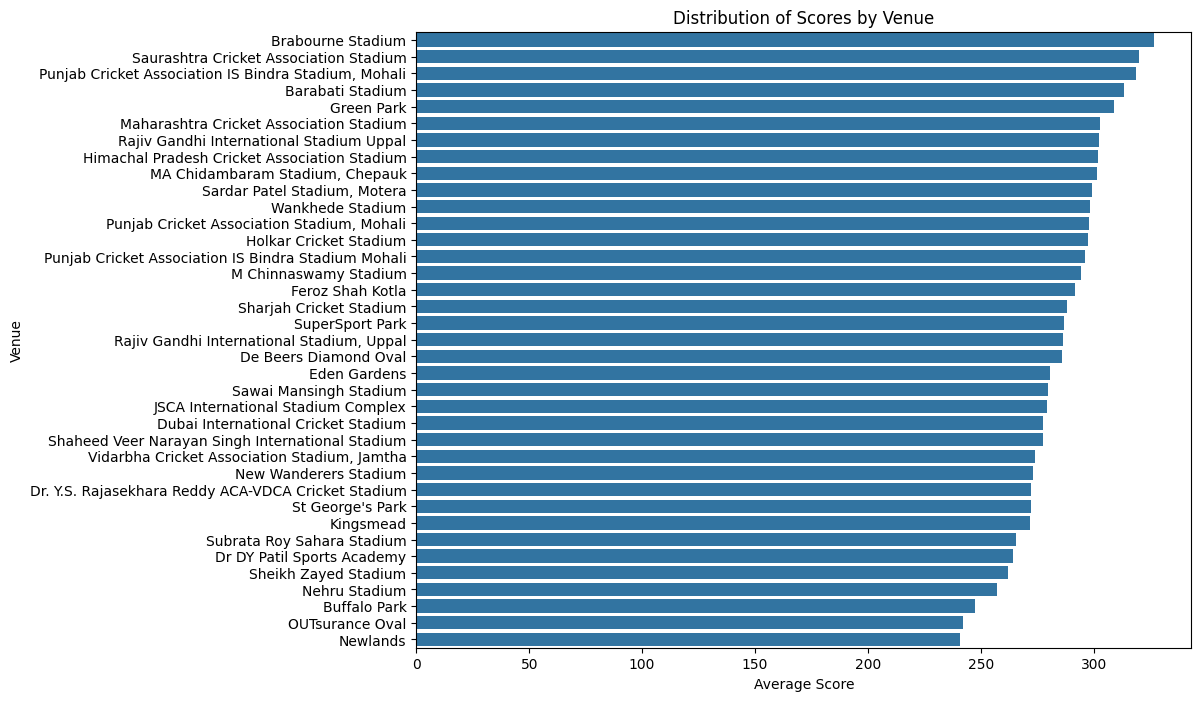

In [0]:
#Importing libraries for visualization
import matplotlib.pyplot as plt
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()
import seaborn as sns
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

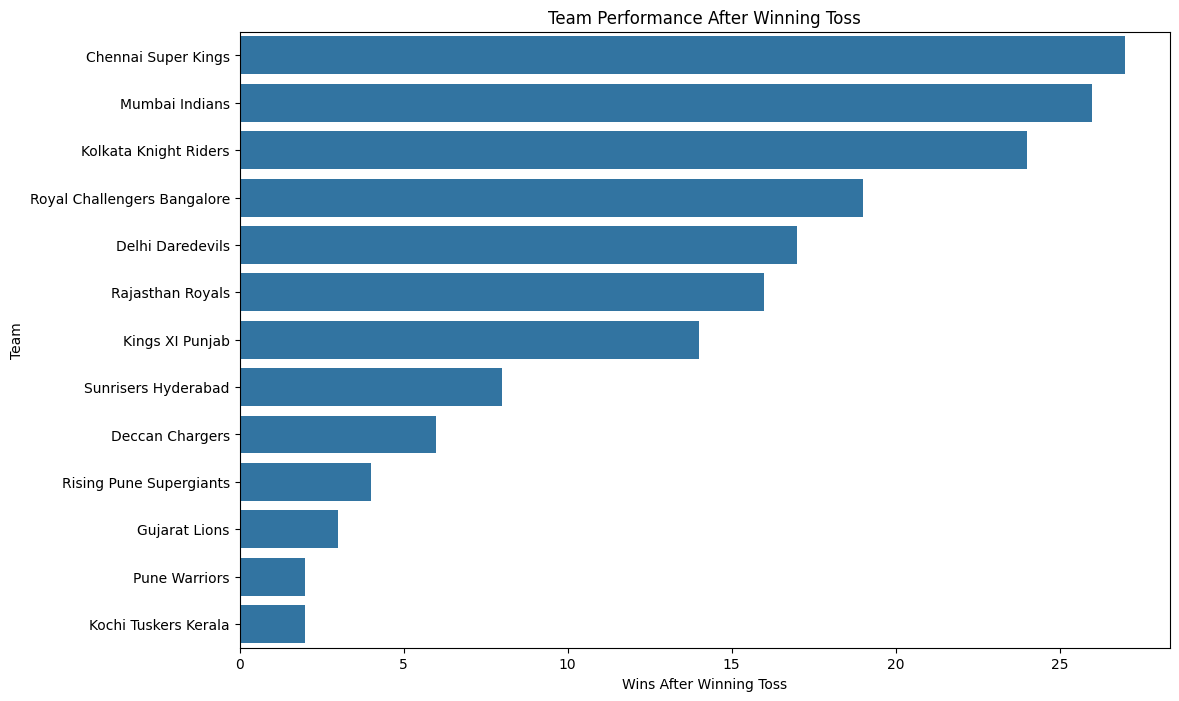

In [0]:
# Execute SQL Query - Wins
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")
# Convert to Pandas DataFrame - Wins after toss winnings
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
     